# Сегментация потребителей интернет-магазина товаров для дома и быта

[Презентация](https://disk.yandex.ru/i/nzxdMFupBWSzSw)\
[Дашборд](https://public.tableau.com/app/profile/andrew1293/viz/Book2_16624734248310/sheet1#1)

Для повышения объёмов продаж отдел маркетинга предлагает сосредоточить свои усилия на таргетированной рекламе. Для этого необходимо сегментировать покупателей по профилю потребления.

**Цель исследования:**  выявление сегментов потребителей для разработки и реализации таргетированной рекламы.

**Гипотеза:** потребности каждого отдельного покупателя интернет-магазина не ситуативны и разнородны, а имеют устойчивую направленность, выражающуюся в преимущественном употреблении ограниченной категории/группы товаров, которую можно выделить и идентифицировать как потребительский сегмент, предполагая, что принадлежность клиента к конкретному сегменту отражает его потребительские интересы, исходя из которых можно делать персонализированные предложения ориентированные на выделенные потребительские группы, которые будут в высокой степени отражать реальные запросы конкретного посетителя магазина.

**Задачи:**

- сегментировать товары на основе принадлежности к той или иной товарной категории;
- проанализировать покупки потребителей;
- сегментировать покупателей на основе истории их покупок;
- сформулировать и проверить статистические гипотезы;
- сформулировать основные выводы и разработать рекомендации как сегментация может помочь в разработке более персонализированных предложений для покупателей.

**Иследование пройдёт в семь этапов:**

    Базовый анализ данных
    Подготовка данных
    Исследовательский анализ данных
    Сегментация товаров
    Сегментация потребителей
    Проверка статистических гипотез
    Формулировка выводов и базовых рекомендаций по применению выявленных сегментов в подготовке предложений клиентам

In [1]:
import pandas as pd
import numpy as np
import requests 
from urllib.parse import urlencode
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy import stats as st

## Базовый анализ данных
Для начала создадим универсальную функцию, которая будет на вход принимать датафрейм, а на выходе будет выводить все необходимые характеристики, поочередно применяя методы head, describe, info, duplicated и unique:

In [2]:
def checking_data(data):
    """Производит набор операций, необходимых для изучения dataframe: head, describe, info, duplicated, unique
    
    В качестве аргумента принимает на вход датафрейм
    """
    print('Обзор данных:')
    display(data.head())
    print('Краткий обзор набора данных:\n')
    data.info()
    print()
    print('Количество пропусков в данных:\n', data.isna().sum())
    print()
    print('Количество дубликатов в данных:', data.duplicated().sum())
    print()
    print('Уникальные значения по возрастанию в начале и конце столбцов:')
    for column in data:#создадим цикл для автоматизированного ввода названий колонок
        try: # обезопасим код
            print(column,':\n', sorted(data[column].unique())[:10], 'Конец списка:',sorted(data[column].unique())[-10:], '\n', 
'Количество уникальных значений в',column, '-', data[column].nunique(dropna = True), '\n')
        except:
            print(column,'Сортировка невозможна!', 'Количество уникальных значений в',column, data[column].nunique(), '\n')
            if len(data[column].unique()) < 50:
                print(column,':\n', data[column].unique(), '\n')

    print()
    print('Cписок характерных значений данных:')
    display(round(data.describe(), 1)) 

Загрузим данные непосредственно из места их хранения на яндекс-диске:

In [3]:
'''
#загружаем данные 
# используем api 
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' 
public_key = 'https://disk.yandex.ru/d/kJwc3szk7vzv_g' 

# получаем url 
final_url = base_url + urlencode(dict(public_key=public_key)) 
response = requests.get(final_url) 
download_url = response.json()['href'] 
 
# загружаем файл
download_response = requests.get(download_url) 
df = pd.read_csv(download_url, sep=',')
'''
pass
#поскольку он, оказывается, есть в datasets, далее работаем оттуда
df = pd.read_csv('/datasets/ecommerce_dataset.csv', sep=',')

С помощью созданной функции checking_data, изучим данные, содержащиеся в файле.

**Описание данных:**

Датасет описывает транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут»:

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

In [4]:
checking_data(df)

Обзор данных:


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


Краткий обзор набора данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB

Количество пропусков в данных:
 date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Количество дубликатов в данных: 0

Уникальные значения по возрастанию в начале и конце столбцов:
date :
 [2018100100, 2018100108, 2018100109, 2018100111, 2018100112, 2018100113, 2018100115, 2018100116, 2018100118, 2018100121] Конец списка: [2019103019, 2019103021, 2019103100, 2019103102, 2019103109, 2019103111, 20

,date,order_id,quantity,price
count,6.737000e+03,6737.0,6737.0,6737.0
mean,2.018855e+09,43128.9,2.5,462.0
std,3.855185e+05,27899.4,15.3,871.3
min,2.018100e+09,12624.0,1.0,9.0
25%,2.019020e+09,14827.0,1.0,101.0
50%,2.019050e+09,68503.0,1.0,135.0
75%,2.019061e+09,70504.0,1.0,398.0
max,2.019103e+09,73164.0,1000.0,14917.0


Данные выглядят сравнительно беспроблемными. Пропуски и явные дубликаты отсутствуют. Явных нелепых выбросов значений по краям диапазонов также не видно. Типы данных соответствуют содержанию столбцов, за исключением столбца `date`, который на всякий случай следует привести к формату datatime.

Итак, мы имеем данные за период с 01.10.2018 по 31.10.2019. Число покупателей, посетивших магазин за этот период - 2451.

Из списка характерных значений вырисовывается портрет типичного клиента магазина: по крайней мере в 75% случаев в одном заказе фигурирует только одна единица товара и медианный чек довольно низок - 135 рублей, если речь не идёт об условных единицах (десятках, сотнях, или тысячах рублей), кроме того, наряду с розничными покупателями, вероятно имеется какой-то процент оптовых, заказывающих сотни и даже 1000 единиц товара, долю которых необходимо выяснить и, возможно, выделить в отдельный сегмент.

Хотя данные и выглядят беспроблемно, тем не менее, визуализируем распределение количества товаров в одном заказе:

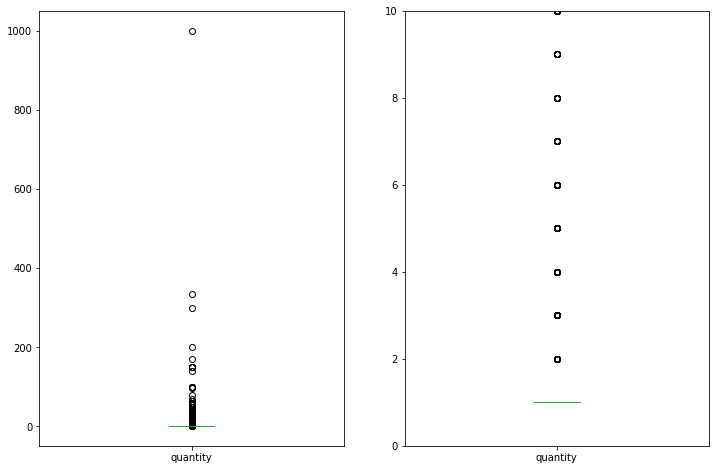

In [5]:
df['quantity'].plot.box(figsize=(12,8), ax=plt.subplot(1,2,1))
df['quantity'].plot.box(figsize=(12,8), ax=plt.subplot(1,2,2))
plt.ylim([0, 10])#изменим диапазон оси y
plt.show()

Число заказов с количеством 1 столь велико, что всё, что начинается с количества 2 выглядит выбросами. Попробуем визуализировать распределение через гистограмму.

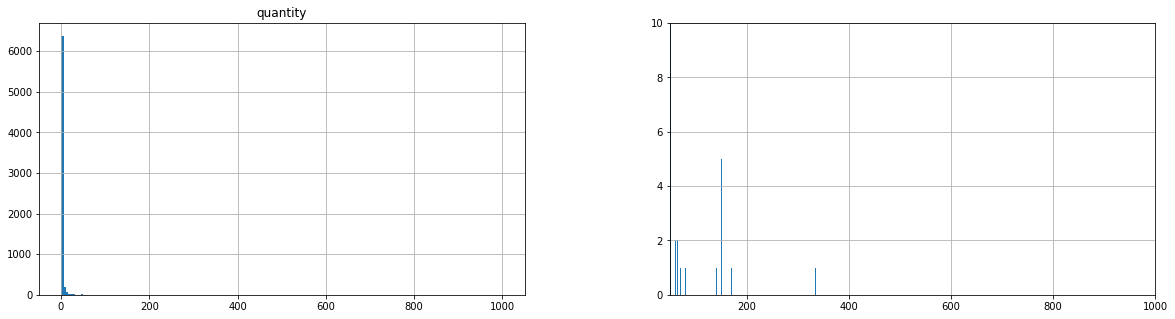

In [6]:
plt.figure(figsize=(20, 5))
df.hist(column='quantity', bins=200, ax=plt.subplot(1,2,1));
df['quantity'].hist(bins=1000, ax=plt.subplot(1,2,2));#"рассмотрим под лупой" правую границу оси х:
plt.ylim([0, 10])
plt.xlim([50, 1000]);

Очевидно, что заказы, где требуется более 170 штук товара, - единичны. Взглянем на них, чтобы оценить реалистичность заказа и убедиться в том, что это не ошибки данных:

In [7]:
df.query('quantity >= 170')

,date,customer_id,order_id,product,quantity,price
568,2018110108,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0
1158,2018121014,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
3961,2019052021,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
5071,2019061107,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0
5456,2019061815,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0


Трудно себе представить, что кому-то могли понадобится вантузы в количестве 1000 штук по розничной цене интернет-магазина, если только речь не идёт о какой-то коррупционной схеме. Посмотрим, являются ли для этих покупателей данные заказы единичными, или они заказывали ещё что-то:

In [8]:
roster = df.query('quantity >= 170')['customer_id']#создаём перечень покупателей
df.query('customer_id in @roster')#смотрим все заказы, сделанные этими покупателями

,date,customer_id,order_id,product,quantity,price
568,2018110108,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,Муляж ЯБЛОКО 9 см красное,170,51.0
1158,2018121014,a984c5b7-ff7e-4647-b84e-ef0b85a2762d,69289,"Ручка-скоба РС-100 белая *Трибатрон*, 1108035",200,29.0
3961,2019052021,5d189e88-d4d6-4eac-ab43-fa65a3c4d106,71478,Муляж ЯБЛОКО 9 см красное,300,51.0
5071,2019061107,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,Вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0
5456,2019061815,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0


Как мы видим, "топ-5 оптовых покупателей" совершали покупки только 1 раз, что не добавляет доверия к этим данным. Посмотрим, сколько раз другие покупатели заказывали этот вантуз: 

In [9]:
plunger = df.loc[5456, 'product']#извлекаем наименование позиции
df.query('product == @plunger')#ищем покупателей вантуза

,date,customer_id,order_id,product,quantity,price
5456,2019061815,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0


Получается, что эти вантузы либо не нужны вовсе, либо требуются в количестве 1000 штук. При необходимости оперирования с данными "оптовых покупателей" они однозначно потребуют либо верификации, либо удаления, потому что выглядят достаточно подозрительно.

Произведём проверку на неявные дубликаты. Сначала проверим, нет ли заказов с одним номером и датой, но с разными `customer_id`:

In [10]:
df.duplicated(subset=['date', 'order_id', 'product', 'quantity', 'price']).sum()

1

Рассмотрим выявленный дубликат:

In [11]:
df[df.duplicated(subset=['date', 'order_id', 'product', 'quantity', 'price'], keep=False)]

,date,customer_id,order_id,product,quantity,price
4297,2019060210,f1222eaa-d09d-4bff-ab4e-bea6fe3f68a8,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0
4298,2019060210,95872093-2887-4ce8-8468-19234990e7d7,71571,"Бегония Элатиор, цвет в ассортименте",1,187.0


Мы видим, что это очевидная ошибка в данных, которая подлежит удалению. Однако, теперь стало интересно, нет ли заказов с одинаковым номером и разными id за другие даты:

In [12]:
df.duplicated(subset=['order_id', 'product', 'quantity', 'price']).sum()

1897

Такое количество неявных дубликатов выглядит подозрительно, учитывая, что у нас всего 6737 записей, - это почти 30% от всех данных. Посмотрим на выявленные дубликаты:

In [13]:
df[df.duplicated(subset=['order_id', 'product', 'quantity', 'price'], keep=False)].head(10)

,date,customer_id,order_id,product,quantity,price
15,2018100118,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Мини-сковорода Marmiton ""Сердце"" с антипригарн...",1,239.0
16,2018100118,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Сковорода алюминиевая с антипригарным покрытие...,1,824.0
17,2018100118,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,Стеклянная крышка для сковороды ALPENKOK 26 см...,1,262.0
18,2018100118,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"Сушилка для белья напольная Colombo Star 18, 3679",1,1049.0
19,2018100121,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
58,2018100218,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
59,2018100219,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
60,2018100220,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
63,2018100304,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 ...,1,3299.0
80,2018100409,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0


В наблюдаемом фрагменте мы видим заказы-клоны от одного и того же клиента, но сделанные в разное время. Поскольку таких позиций очень много, вряд ли мы имеем дело с ошибкой выгрузки данных. В условиях "учебного боя" уточнить мы это не можем, нам остаётся предположить, что либо документооборот магазина настроен таким образом, что "клонирует" номер заказа, в случае, если он поступает от одного и того же клиента на аналогичную номенклатуру товаров, либо речь идёт о "дробной поставке" одного большого заказа. Не исключён вариант, что клиент использует магазин для коммерческих целей, как аналог системы поставки "точно-в-срок". Поэтому отнесёмся к заказам-клонам не как к ошибочным данным, а как к реально существующим заказам. Можно было присвоить каждому "клону" свой уникальный номер, но мы пока это делать не будем, т.к. реальная необходимость в этом из точки исследования, в которой мы находимся сейчас, не просматривается.\
Однако, вероятность того, что в данных всё же остаются дубликаты заказов, сделанные под одним номером от разных клиентов нами пока не опровергнута. Попробуем выявить их другим способом:

In [14]:
df.pivot_table(index='order_id', values='customer_id', aggfunc='nunique').query('customer_id > 1').count()


customer_id    29
dtype: int64

29 неявных дубликатов в наших данных всё же имеют место быть. Проверим правильность их выявления:

In [15]:
dublicates_list = df.pivot_table(index='order_id', values='customer_id',
                                 aggfunc='nunique').query('customer_id > 1').index.tolist()
df.query('order_id in @dublicates_list').head(4)

,date,customer_id,order_id,product,quantity,price
512,2018102822,0b5ce2c7-acef-4a9a-b821-61a44ed05557,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0
538,2018103021,c1dd5c0e-51db-4a5d-91a3-5374cb20043d,68785,"Сиденье в ванну раздвижное, белый, СВ5, НИКА",1,374.0
1154,2018121012,2f955596-4b13-432e-93f3-6433395aafe6,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0
1160,2018121016,e3805ccd-2d64-4d0e-92dd-902293555c35,69283,Сушилка для белья на батарею НИКА СБ6-65 двухъ...,1,164.0


Всё верно, в таблице действительно есть заказы за одним номером от разных покупателей, и в этом случае логичного объяснения, кроме ошибки системы не находится. Самым оптимальным с точки зрения трудозатрат будет полное удаление этих заказов из датафрейма. Разберёмся с этим на этапе подготовки данных.

Отметим найденные потенциально проблемные вопросы с данными и на этом будем считать базовый анализ законченным.

## Подготовка данных
Подготовим данные к анализу, согласно заранее намеченному плану:

In [16]:
#удалим неявные дубликаты

#отдельно почистим от дубликатов список с "неявными дубликатами"

df_dublicates = df.query('order_id in @dublicates_list')\
                                    .drop_duplicates(subset=['order_id', 'product', 'quantity', 'price'])

#полностью очищаем базовый дата-фрейм от "токсичных заказов"
df = df.query('order_id not in @dublicates_list')

#возвращаем "почищенные данные"
df = pd.concat([df, df_dublicates], axis=0, ignore_index=True)

#Проверим успешность операции:
print('Количество неявных дубликатов равно:',
      df.pivot_table(index='order_id', values='customer_id', aggfunc='nunique').query('customer_id > 1').count())

Количество неявных дубликатов равно: customer_id    2
dtype: int64


Неявные дубликаты, тем не менее, остались. Попробуем удалить их вручную:

In [17]:
df.pivot_table(index='order_id', values='customer_id', aggfunc='nunique').query('customer_id > 1')

,customer_id
order_id,
69485,2
70903,2


Посмотрим, что это за позиции:

In [18]:
df.query('order_id == 69485 or order_id == 70903')

,date,customer_id,order_id,product,quantity,price
6653,2018122016,5be0f4b4-947f-4672-b147-73ef5936ecd4,69485,Набор столовых приборов 24 предмета SAINT GERM...,1,1087.0
6654,2018122111,266beb08-ec9b-43b4-89bb-ac60fa23ffee,69485,Набор столовых приборов 24 предмета FARANDOLE ...,1,1274.0
6662,2019032810,5e5a3e1a-0388-4131-a770-f6e3b696985b,70903,Средство против засоров в системах водопровода...,1,104.0
6666,2019050101,718316fc-bdf3-4d1d-b8f1-a5c763238ff4,70903,Средство против засоров в системах водопровода...,1,142.0


Действительно, мы имеем 2 заказа с одинаковым номером, сделанные разными покупателями, и хотя они сделаны в разное время, тем не менее, будем придерживаться той точки зрения, что заказы с одинаковым номером могут быть только от одного покупателя, поэтому удаляем один из дубликатов:

In [19]:
df.drop(labels = [6654, 6666],axis = 0, inplace=True)

In [20]:
#Проверим успешность операции:
print('Количество неявных дубликатов равно:',
      df.pivot_table(index='order_id', values='customer_id', aggfunc='nunique').query('customer_id > 1').count())

#переведём колонку date в формат datetime
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H')

#добавляем колонку с суммой покупки
df['amount'] = df['quantity'] * df['price']

#добавляем колонку с годом и месяцем покупки
df['month_year'] = df['date'].dt.strftime('%Y-%m')

#проверяем успешность проведённых операций
display(df.head())
display(df.tail(1))
df.info()

Количество неявных дубликатов равно: customer_id    0
dtype: int64


,date,customer_id,order_id,product,quantity,price,amount,month_year
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,194.0,2018-10
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,2018-10
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,2018-10
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,2018-10


,date,customer_id,order_id,product,quantity,price,amount,month_year
6680,2019-10-13 15:00:00,b1dbc7c4-3c84-40a7-80c9-46e2f79d24ad,72950,Кастрюля эмалированная Стэма С-1624 12 л цилин...,1,974.0,974.0,2019-10


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6679 entries, 0 to 6680
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6679 non-null   datetime64[ns]
 1   customer_id  6679 non-null   object        
 2   order_id     6679 non-null   int64         
 3   product      6679 non-null   object        
 4   quantity     6679 non-null   int64         
 5   price        6679 non-null   float64       
 6   amount       6679 non-null   float64       
 7   month_year   6679 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 469.6+ KB


Подготовка данных прошла успешно. В результате борьбы с неявными дубликатами потеряна 91 строчка, что, очевидно,  несущественно для нашего объёма данных.

## Исследовательский анализ данных
Посчитаем, какой процент "оптовых заказов" мы имеем вообще. Примем за критерий "оптового заказа" количество одной позиции в одном заказе >= 10:

In [21]:
print(f"Количество условно-оптовых заказов составляет \
{df.query('quantity >= 10')['quantity'].count()/df['quantity'].count():.2%}")

Количество условно-оптовых заказов составляет 3.91%


Отметим, что количество условно-оптовых заказов является заметным.

Посмотрим, какое количество покупателей заказывает более одного товара в одном заказе:

In [22]:
#агреггируем данные по номеру заказа и считаем количество продуктов в заказе
df.pivot_table(index='order_id', values='product', aggfunc='count').query('product > 1').describe()

,product
count,609.000000
mean,7.395731
std,37.349426
min,2.000000
25%,2.000000
50%,3.000000
75%,6.000000
max,888.000000


Очевидно, что 888 позиций в одном заказе очень смущает воображение. Исследуем этот случай:

In [23]:
#найдём номер заказа, состоящего из 888 позиций
df.pivot_table(index='order_id', values='product', aggfunc='count').query('product == 888')

,product
order_id,
14833,888


In [24]:
#выводим 888 позиционный заказ
df.query('order_id == 14833')

,date,customer_id,order_id,product,quantity,price,amount,month_year
4100,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0,120.0,2019-05
4101,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,1,120.0,120.0,2019-05
4102,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Горный, кассета по 6шт",1,120.0,120.0,2019-05
4103,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Зебра кассета 6 шт E6,1,120.0,120.0,2019-05
4104,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Золотинка кассета 6 шт E6,1,120.0,120.0,2019-05
...,...,...,...,...,...,...,...,...
5473,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Фараон ячейки по 6 шт Е6,1,120.0,120.0,2019-06
5474,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,1,120.0,120.0,2019-06
5475,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт Диск, кассета по 6шт",1,120.0,120.0,2019-06
5476,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт НЛО Белый, кассета по 6шт",1,120.0,120.0,2019-06


Вероятно, мы имеем дело с "заказами-клонами", обнаруженными нами на этапе базового анализа данных, - в один заказ включены позиции с разными датами размещения - от 31 мая до 22 июня. Очевидно, что под одним номером зарегистрировано довольно много разных заказов. Попробуем узнать, сколько таких проблемных заказов у нас в данных:

In [25]:
#агреггируем данные по номеру заказам и считаем количество дат на один заказ + считаем количество позиций где дат > 2
df.pivot_table(index='order_id', values='date', aggfunc='count').query('date > 1').count()

date    609
dtype: int64

Таким образом, все 608 заказов в которых число позиций превышает единицу, представляют собой одинаковые номера заказов с разными датами. Проверим гипотезу, что в разные даты повторяется один и тот же заказ по номенклатуре:

In [26]:
df.query('order_id == 14833 and date == "2019-05-31 12:00:00"')

,date,customer_id,order_id,product,quantity,price,amount,month_year
4100,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0,120.0,2019-05
4101,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,1,120.0,120.0,2019-05
4102,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Горный, кассета по 6шт",1,120.0,120.0,2019-05
4103,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Зебра кассета 6 шт E6,1,120.0,120.0,2019-05
4104,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Золотинка кассета 6 шт E6,1,120.0,120.0,2019-05
4105,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Сосновский, кассета по 6шт",1,120.0,120.0,2019-05
4106,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Кристина ячейки по 6 шт Е6,1,120.0,120.0,2019-05
4107,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Фараон ячейки по 6 шт Е6,1,120.0,120.0,2019-05
4108,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,1,120.0,120.0,2019-05
4109,2019-05-31 12:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт Диск, кассета по 6шт",1,120.0,120.0,2019-05


In [27]:
df.query('order_id == 14833 and date == "2019-06-22 06:00:00"')

,date,customer_id,order_id,product,quantity,price,amount,month_year
5466,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Аэронавт, кассета по 6шт",1,120.0,120.0,2019-06
5467,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Белогор кассета 6 шт E6,1,120.0,120.0,2019-06
5468,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Горный, кассета по 6шт",1,120.0,120.0,2019-06
5469,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Зебра кассета 6 шт E6,1,120.0,120.0,2019-06
5470,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Кабачка сорт Золотинка кассета 6 шт E6,1,120.0,120.0,2019-06
5471,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Кабачка сорт Сосновский, кассета по 6шт",1,120.0,120.0,2019-06
5472,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Кристина ячейки по 6 шт Е6,1,120.0,120.0,2019-06
5473,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурец Фараон ячейки по 6 шт Е6,1,120.0,120.0,2019-06
5474,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,Рассада Огурца сорт Каролина кассета 6 шт E6,1,120.0,120.0,2019-06
5475,2019-06-22 06:00:00,1d6c8c1f-a799-4418-9af2-1ded47d7a85c,14833,"Рассада Патиссона сорт Диск, кассета по 6шт",1,120.0,120.0,2019-06


Гипотеза подтвердилась. Вероятно, заказы с одинаковым номером имеют идентичную номенклатуру. Таким образом, речь идёт о клонах заказов, сделанных в разные даты, по крайней мере, для какой-то части заказов.\
Посчитаем количество "многопозиционных" заказов c учётом выявленных нами особенностей организации данных:

In [28]:
#группируем данные по заказу и продукту, изолируя тем самым эффект "клонирования"
df_qvt_per_order = df.pivot_table(index=['order_id', 'product'], values='quantity', aggfunc='first').reset_index()
df_qvt_per_order.pivot_table(index='order_id', values='product', aggfunc='count').query('product > 1').describe()

,product
count,402.000000
mean,6.054726
std,5.686927
min,2.000000
25%,3.000000
50%,4.000000
75%,7.000000
max,51.000000


Что уже гораздо больше похоже на правду. Визуализируем многопозиционные заказы:

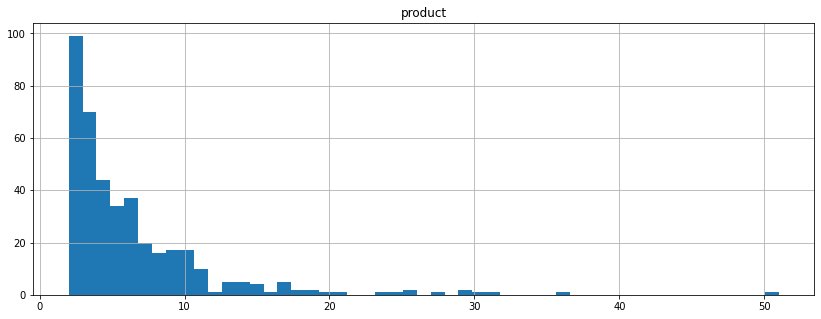

In [29]:
df_qvt_per_order.pivot_table(index='order_id', values='product',
                             aggfunc='count').query('product > 1').hist(bins=51, figsize=(14, 5));

Посчитаем долю многопозиционных заказов в общем чиcле заказов:

In [30]:
print(f"Доля многопозиционных заказов составляет \
{df_qvt_per_order.pivot_table(index='order_id', values='product', aggfunc='count').query('product > 1')['product'].count()/df_qvt_per_order.pivot_table(index='order_id', values='product', aggfunc='count')['product'].count():.2%}")

Доля многопозиционных заказов составляет 14.44%


Итак, доля очищенных от клонов "многопозиционных" заказов составляет примерно 15 % от общего числа заказов.

Теперь визуализируем покупателей, которые делали не один, а несколько заказов в "отчётный" промежуток времени:

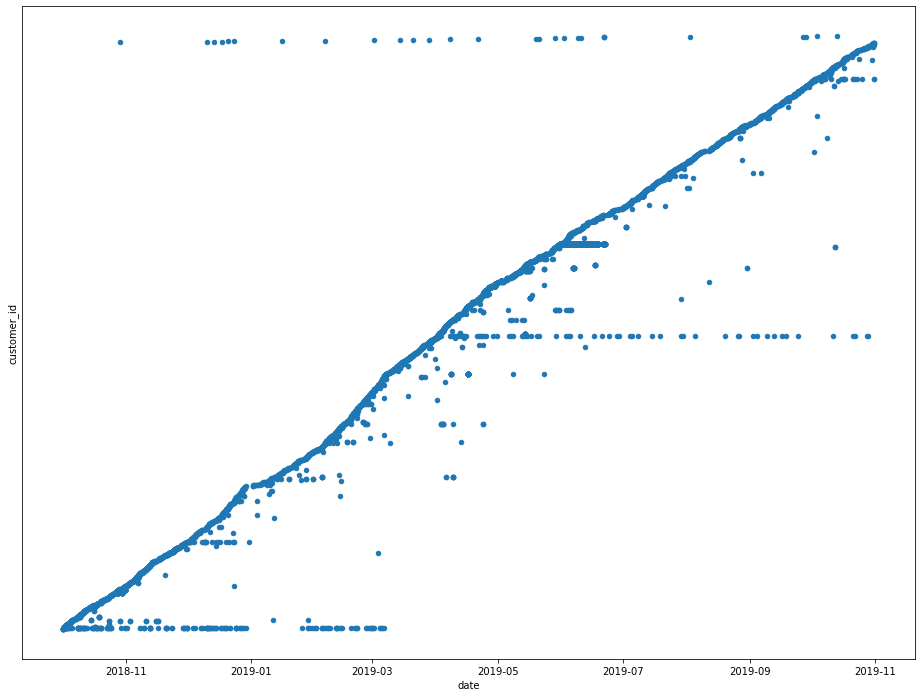

In [31]:
df.plot.scatter('date', 'customer_id', figsize=(16, 12))
plt.yticks([])
plt.show()

Судя по диаграмме рассеивания, количество "постоянных" покупателей, которые обращались бы в магазин повторно, довольно низкое.\
Визуализируем количество повторных заказов от посетителей без учёта "клонов":

In [32]:
df.pivot_table(index='customer_id', values='order_id', aggfunc='nunique').query('order_id > 1').describe()

,order_id
count,158.000000
mean,3.303797
std,10.247702
min,2.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,126.000000


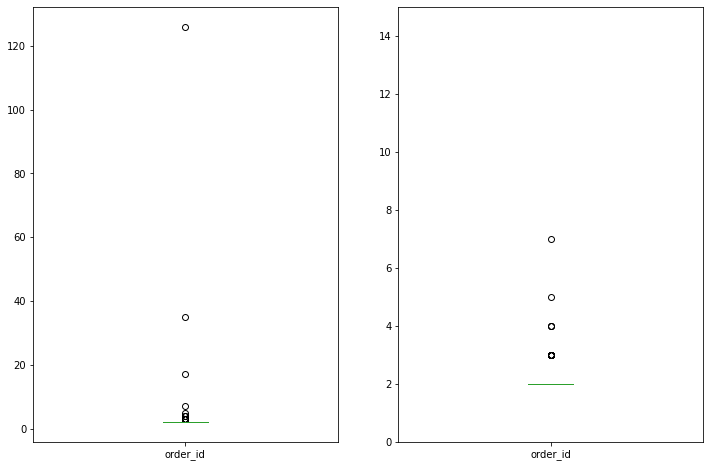

In [33]:
df.pivot_table(index='customer_id', values='order_id', aggfunc='nunique').query('order_id > 1').plot.box(figsize=(12,8), ax=plt.subplot(1,2,1))
df.pivot_table(index='customer_id', values='order_id', aggfunc='nunique').query('order_id > 1').plot.box(figsize=(12,8), ax=plt.subplot(1,2,2))
plt.ylim([0, 15])#изменим диапазон оси y
plt.show()

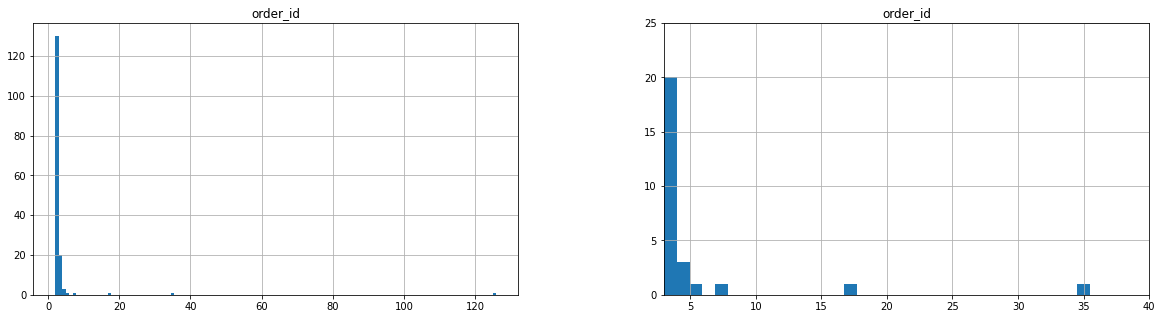

In [34]:
plt.figure(figsize=(20, 5))
df.pivot_table(index='customer_id', values='order_id',
               aggfunc='nunique').query('order_id > 1').hist(bins=126, ax=plt.subplot(1,2,1));

#меняем масштаб:
df.pivot_table(index='customer_id', values='order_id',
               aggfunc='nunique').query('order_id > 1').hist(bins=126, ax=plt.subplot(1,2,2));
plt.ylim([0, 25])
plt.xlim([3, 40])
plt.show()

Количество вариативных (неклонированных) повторных покупок, как мы видим, не очень высокая. При этом в основной своей массе клиенты заказывают не более 2 раз. Посчитаем долю повторных покупателей:

In [35]:
print(f"Доля вариативных повторных покупателей составляет \
{df.pivot_table(index='customer_id', values='order_id', aggfunc='nunique').query('order_id > 1')['order_id'].count() / df.pivot_table(index='customer_id', values='order_id', aggfunc='nunique')['order_id'].count():.2%}")
print(f"\nДоля вариативных повторных покупок составляет \
{df.pivot_table(index='customer_id', values='order_id', aggfunc='nunique').query('order_id > 1')['order_id'].sum() / df.pivot_table(index='customer_id', values='order_id', aggfunc='nunique')['order_id'].sum():.2%}")

Доля вариативных повторных покупателей составляет 6.53%

Доля вариативных повторных покупок составляет 18.75%


Эти покупатели могут быть для нас очень важны, т.к. по ним мы можем судить, остаются ли "возвращенцы" в рамках одного и того же потребительского сегмента, или предпочитают разные.

Оценим теперь долю заказов-клонов, среди общего количества заказов:

In [36]:
df.pivot_table(index='order_id', values='date', aggfunc='nunique').query('date > 1').describe()

,date
count,256.000000
mean,3.269531
std,6.039219
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,74.000000


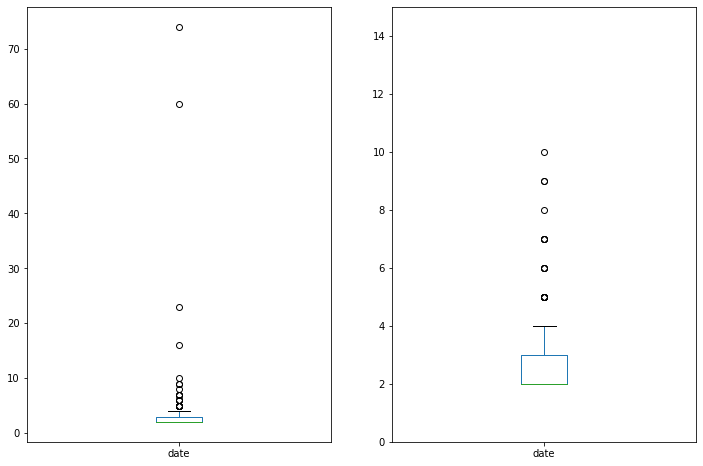

In [37]:
df.pivot_table(index='order_id', values='date', aggfunc='nunique').query('date > 1').plot.box(figsize=(12,8), ax=plt.subplot(1,2,1))
df.pivot_table(index='order_id', values='date', aggfunc='nunique').query('date > 1').plot.box(figsize=(12,8), ax=plt.subplot(1,2,2))
plt.ylim([0, 15])#изменим диапазон оси y
plt.show()

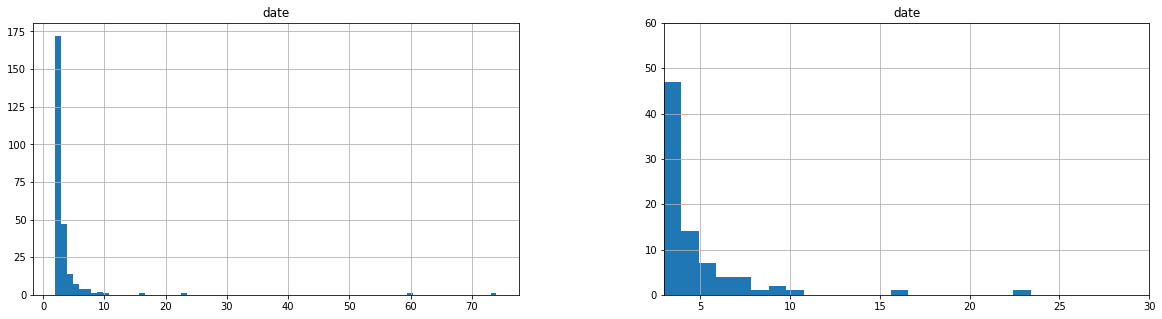

In [38]:
plt.figure(figsize=(20, 5))
df.pivot_table(index='order_id', values='date',
               aggfunc='nunique').query('date > 1').hist(bins=74, ax=plt.subplot(1,2,1));

#меняем масштаб:
df.pivot_table(index='order_id', values='date',
               aggfunc='nunique').query('date > 1').hist(bins=74, ax=plt.subplot(1,2,2));
plt.ylim([0, 60])
plt.xlim([3, 30])
plt.show()

In [39]:
print(f"Доля заказов-клонов составляет \
{df.pivot_table(index='order_id', values='date', aggfunc='nunique').query('date > 1')['date'].sum() / df.pivot_table(index='order_id', values='date', aggfunc='nunique')['date'].sum():.2%}")

Доля заказов-клонов составляет 24.87%


Получается, что в совокупности, общее число повторных заказов составляет примерно 40%, - почти половину от всех заказов, что неожиданно много. Интересно было бы узнать, какой процент пользователей генерирует повторные заказы и пересекаются ли подмножества "клонов" и "вариативщиков", назовём первых "клонирующими покупателями", а вторых "возвращающимися": 

In [40]:
#выделим подмножество "вариативщиков" (return_customer)
return_buyer = df.pivot_table(index='customer_id', values='order_id',
               aggfunc='nunique').query('order_id > 1').reset_index()['customer_id']

#выделим подмножество "клонировщиков" (cloning_buyer)
cloned_orders = df.pivot_table(index='order_id', values='date',
                               aggfunc='nunique').query('date > 1').reset_index()['order_id']#выделим клонированные заказы
cloning_buyer = df.query('order_id in @cloned_orders')['customer_id'].unique()#получаем "клонирующих" покупателей

#выделим подмножество покупателей, присутсвующих в обоих списках (return_cloning_buyer)
return_cloning_buyer = set(return_buyer) & set(cloning_buyer)#находим пересечение подмножеств

#выводим значения
print(f'Количество делающих разные заказы покупателей равно {return_buyer.count()}')
print(f'Количество "клонирующих заказы" покупателей равно {len(cloning_buyer)}')
print(f'Количество покупателей, демонстрирующих оба типа поведения: {len(return_cloning_buyer)}')

Количество делающих разные заказы покупателей равно 158
Количество "клонирующих заказы" покупателей равно 253
Количество покупателей, демонстрирующих оба типа поведения: 27


Итак, на данный момент у нас **выделено 4 устойчивых типа поведения клиентов интернет-магазина:**
- совершающих одиночные заказы, которых подавляющее большинство;
- делающих повторные заказы;
- клонирующие заказы, или, иначе говоря, делающие заказы с регулярной поставкой;
- делающие и повторные и "клонированные" заказы.
Последние 3 класса можно условно объединить в категорию "лояльных клиентов". Не смотря на то, что их количество невелико, по предварительным оценкам, они генерируют около половины от общего количества заказов.

Посчитаем точную долю заказов, поступающих от "лояльных клиентов":

In [41]:
loyal_buyers = set(return_buyer) | set(cloning_buyer)#объединяем множества
print('Доля "лояльных покупателей": {:.2%}'.format(len(loyal_buyers)/df['customer_id'].nunique()))
print('Доля заказов от "лояльных покупателей": {:.2%}'.format(df.query('customer_id in @loyal_buyers')
    .pivot_table(index='order_id', values='date', aggfunc='nunique')['date'].sum()/df.pivot_table(index='order_id',
                                                                        values='date', aggfunc='nunique')['date'].sum()))
print('Доля выручки от "лояльных покупателей": {:.2%}'.format(df.query('customer_id in @loyal_buyers')
    .pivot_table(index='order_id', values='amount', aggfunc='sum')['amount'].sum()/df['amount'].sum()))

Доля "лояльных покупателей": 15.87%
Доля заказов от "лояльных покупателей": 39.49%
Доля выручки от "лояльных покупателей": 33.58%


Итак, "лояльные покупатели" генерируют почти 40% от общего числа заказов, и дают 34% выручки, при том, что их доля от общего числа клиентов соcтавляет 16%.\
Итак, в ходе исследовательского анализа удалось выявить 4 группы потребителей, с каждой из которых, предположительно, следует вести работу специальным образом.
В заключении этапа посмотрим на положение дел, за рассматриваемый период, в магазине в целом, касательно распределения по времени количества заказов и выручки:

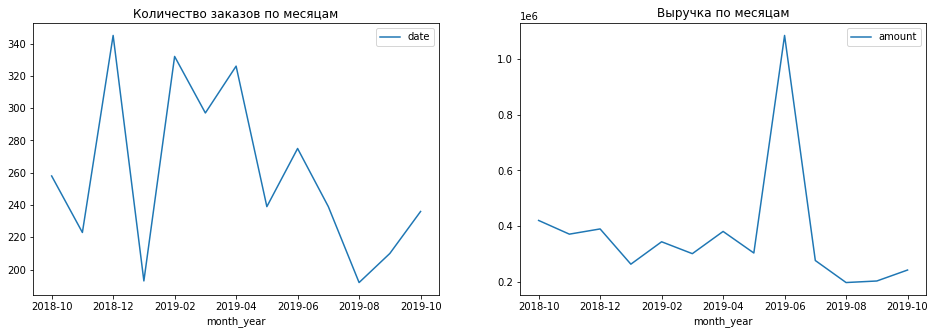

In [42]:
#готовим данные для учёта "клонированных" заказов
order_per_month = df.pivot_table(index=['month_year', 'order_id'], values='date', aggfunc='nunique').reset_index()

#выводим графики
plt.figure(figsize=(16, 5))
order_per_month.pivot_table(index='month_year', values='date', aggfunc='sum').plot(ax=plt.subplot(1,2,1))
plt.title('Количество заказов по месяцам')
df.pivot_table(index='month_year', values='amount', aggfunc='sum').plot(ax=plt.subplot(1,2,2))
plt.title('Выручка по месяцам')
plt.show()

Стоит отметить невероятный взлёт выручки в июне 2019 года. Вероятно, торговля "золотыми вантузами" очень прибыльное дело.\
На этапе EDA ограничимся общей картиной. Установлением сходств/различий в поведении обозначенных категорий покупателей займёмся позже.

## Сегментация товаров
Перейдём к основным этапам нашего исследования, и начнём с сегментации товаров.\
Взглянем на фрагмент ассортимента товаров, которым торгует интернет-магазин:

In [43]:
for product in df['product'].unique()[:15]:
    print(product)

Комнатное растение в горшке Алое Вера, d12, h30
Комнатное растение в горшке Кофе Арабика, d12, h25
Радермахера d-12 см h-20 см
Хризолидокарпус Лутесценс d-9 см
Циперус Зумула d-12 см h-25 см
Шеффлера Лузеана d-9 см
Юкка нитчатая d-12 см h-25-35 см
Настенная сушилка для белья Gimi Brio Super 100
Таз пластмассовый 21,0 л круглый "Водолей" С614, 1404056
Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379
Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331
Сушилка для белья потолочная Zalger Lift Basic 1520 200 см, 10 м
Чехол Eurogold Clean Basic хлопок для досок 120х38-120х42 см C42
Крючок одежный 2-х рожковый серый металлик с полимерным покрытием *Тонар*, 1110027
Корзина мягкая пластиковая 17 л, М-пластика, M2880


Из фрагмента мы видим, что ключевое слово, необходимое и достаточное для соотнесения товара к тому или иному сегменту, как правило, стоит первым, поэтому при классификации будем исходить из предположения, что большую часть товара можно будет соотнести по этому признаку. Сначала выведем уникальные названия товарных позиций, чтобы иметь возможность в спорных случаях соотносить ключевые слова с их названиями, а затем сформируем список уникальных значений первых слов товаров:

In [44]:
#выделим "слова-ключи" и поместим их в таблицу
pd.set_option('display.max_rows', 461)
key_words=[]
for string in df['product'].unique():   
    key_words.append(string.split(' ', 1)[0])
segment_tab = pd.DataFrame(sorted(set(key_words)), columns=['key_words'])
segment_tab.head(5)# для реальной работы выводилась вся таблица целиком

,key_words
0,Tepмокружка
1,Ёрш
2,Автоматическая
3,Агератум
4,Адиантум


Самым правильным будет извлечь ключевые слова для "словарей", определяющих сегмент товара непосредственно из таблицы уникальных значений "ключевых слов" `segment_tab`, поскольку это позволит нам изолировать фактор возможных ошибок, опечаток, пропусков и замены кирилических символов на латиницу в исходных наименованиях товара - если слова попадают в "словари" сразу из списка, то они сразу являются "оригинальными" ключами, и могут применятся "как есть".\
Возьмём `segment_tab`, помещаем в TTS, устанавливаем нужные паузы, и под диктовку вручную разносим номера ключевых слов по колонкам таблицы.\
При анализе удалось выделить следующие категории товарных сегментов:
- 'Цветы'
- 'Комнатные растения'
- 'Рассада, семена, саженцы'
- 'Ручные орудия труда'
- 'Аксессуары для композиций'
- 'Посуда'
- 'Бытовая мебель'
- 'Фурнитура'
- 'Кухонно-хозяйственные приборы и принадлежности'
- 'Бытовая химия'
- 'Средства личной гигиены'
- 'Бытовая техника'

Кроме того, получилось утвердится по мнении, что одного первого слова в названии товара в подавляющем большинстве случаев достаточно для его товарной классификации, за очень маленьким исключением, которое целесообразнее откорректировать изменив название товара без изменения его значения.\
Создадим функцию для "восстановления" из индексов ключевых слов списков с их строковыми значениями:

In [45]:
#функция для формирования словарей товарных категорий 
'''Возвращает список ключевых слов из таблицы segment_tab

Принимает на вход список номеров индексов из таблицы segment_tab
'''

def dictionary_maker(key_number_list):
    dictionary = []
    for num in key_number_list:
        dictionary.append(segment_tab.loc[num, 'key_words'])
    return dictionary

Размещаем готовый файл с индексами ключевых слов на yandex.disc и забираем его оттуда:

Поскольку яндекс.диск имеет лимит на количество скачиваний, сохраняем приготовленный файл "локально" и далее работаем с него:

In [46]:
#открываем файл со словарями категорий
dic_df = pd.read_csv('dictionaries_df.csv', sep=',')
#dic_df = pd.read_csv('classifier.csv', sep=';')
#dic_df.head()

,flowers,indoor_plants,sss,tools,floristry,tableware,furniture,fasteners,kitchenware,chemistry,hygienic_kit,household_appliances
0,3.0,8.0,7.0,112.0,87.0,0.0,56.0,102.0,1,12.0,110.0,393.0
1,4.0,27.0,16.0,134.0,114.0,37.0,58.0,165.0,2,13.0,217.0,398.0
2,5.0,66.0,23.0,183.0,115.0,38.0,59.0,169.0,25,18.0,218.0,406.0
3,6.0,90.0,24.0,322.0,213.0,41.0,147.0,263.0,30,28.0,260.0,449.0
4,9.0,103.0,26.0,323.0,416.0,62.0,282.0,264.0,34,35.0,386.0,NaN


Таблица в полном порядке. Теперь формируем из индексов "словари" с ключевыми словами выделенных нами товарных сегментов:

In [47]:
#формируем "словари" и список названий словарей
for column in dic_df.columns:
    exec(f"cat_{column} = dictionary_maker(dic_df[column].dropna().astype('int').tolist())")
    print(f'cat_{column}')

cat_flowers
cat_indoor_plants
cat_sss
cat_tools
cat_floristry
cat_tableware
cat_furniture
cat_fasteners
cat_kitchenware
cat_chemistry
cat_hygienic_kit
cat_household_appliances


Создадим пробную функцию для тестирования полноты составления словарей и выявления ошибок:

In [48]:
#создаём функцию для сегментации товаров
def categories_maker(str):
    '''Возвращает категорию товаров по ключевым словам в списках

    В качестве аргумента принимает столбец датафрейма с ключевыми словами
    '''
    if str in cat_flowers:
        return 'Цветы'
    if str in cat_indoor_plants:
        return 'Комнатные растения'
    if str in cat_sss:
        return 'Рассада, семена, саженцы'
    if str in cat_tools:
        return 'Ручные орудия труда'
    if str in cat_floristry:
        return 'Аксессуары для композиций'
    if str in cat_tableware:
        return 'Посуда'
    if str in cat_furniture:
        return 'Бытовая мебель'
    if str in cat_fasteners:
        return 'Фурнитура'
    if str in cat_kitchenware:
        return 'Кухонно-хозяйственные приборы и принадлежности'
    if str in cat_chemistry:
        return 'Бытовая химия'
    if str in cat_hygienic_kit:
        return 'Средства личной гигиены'
    if str in cat_household_appliances:
        return 'Бытовая техника'

In [49]:
#сегментируем продукты по категориям
segment_tab['category_product'] = segment_tab['key_words'].apply(categories_maker)

#проверяем допущенные ошибки в словарях
segment_tab['category_product'].isna().sum()

0

Функция отработала корректно, пропусков в словарях нет, однако, для однозначного определения категории товара по первому слову нам необходимо внести несколько изменений в датафрейм, а именно, заменить:

'*Паста зубная* для профилактики заболеваний десен Kobayashi Японский кипарис и белая береза 100 г Япония 4987072072752'\
на\
'*Зубная паста* для профилактики заболеваний десен Kobayashi Японский кипарис и белая береза 100 г Япония 4987072072752'

'*Декоративная коробка* Stockholm XL Classico 30*25*40 см D 04711-D41 Curver 04711-D41'\
'*Декоративная коробка* AMSTERDAM L Miss New York пластиковая 40х30х24 см Curver D 04730-M35'\
на\
'*Коробка декоративная* Stockholm XL Classico 30*25*40 см D 04711-D41 Curver 04711-D41'\
'*Коробка декоративная* AMSTERDAM L Miss New York пластиковая 40х30х24 см Curver D 04730-M35'

Сделаем это:

In [50]:
#корректируем названия продуктов, не поддающиеся однозначной классификации по ключевому слову
df.loc[df['product'] == 'Паста зубная для профилактики заболеваний десен Kobayashi Японский кипарис и \
белая береза 100 г Япония 4987072072752', 'product'] = 'Зубная паста для профилактики заболеваний десен \
Kobayashi Японский кипарис и белая береза 100 г Япония 4987072072752'

df.loc[df['product'] == 'Декоративная коробка Stockholm XL Classico 302540 см D 04711-D41 \
Curver 04711-D41', 'product'] = 'Коробка декоративная Stockholm XL Classico 302540 см D 04711-D41 Curver 04711-D41'

df.loc[df['product'] == 'Декоративная коробка AMSTERDAM L Miss New York пластиковая 40х30х24 см \
Curver D 04730-M35', 'product'] = 'Коробка декоративная AMSTERDAM L Miss New York пластиковая 40х30х24 \
см Curver D 04730-M35'

Теперь напишем функцию для сегментации товаров из нашего реального датафрейма:

In [51]:
#пишем "боевую функцию"
def product_segment_maker(data):
    '''Возвращает сегмент продукта по первому слову в его названии

    Аргументом является столбец датафрейма с наименованием продукта
    '''
    str=data.split(' ', 1)[0]
    if str in cat_flowers:
        return 'Цветы'
    if str in cat_indoor_plants:
        return 'Комнатные растения'
    if str in cat_sss:
        return 'Рассада, семена, саженцы'
    if str in cat_tools:
        return 'Ручные орудия труда'
    if str in cat_floristry:
        return 'Аксессуары для композиций'
    if str in cat_tableware:
        return 'Посуда'
    if str in cat_furniture:
        return 'Бытовая мебель'
    if str in cat_fasteners:
        return 'Фурнитура'
    if str in cat_kitchenware:
        return 'Кухонно-хозяйственные приборы и принадлежности'
    if str in cat_chemistry:
        return 'Бытовая химия'
    if str in cat_hygienic_kit:
        return 'Средства личной гигиены'
    if str in cat_household_appliances:
        return 'Бытовая техника'   

Применим фунцию и получим результат:

In [52]:
#применяем функцию
df['product_segment'] = df['product'].apply(product_segment_maker)

#проверяем результат
display(df.head(1))

#проверяем пропуски
df['product_segment'].isna().sum()

,date,customer_id,order_id,product,quantity,price,amount,month_year,product_segment
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,2018-10,Комнатные растения


0

Функция отработала корректно. Все продаваемые продукты сегментированы по категориям. Оценим правильность разбиения по категориям:

Явных ошибок не выявлено. Сегментацию товаров можно считать завершённой.

## Сегментация потребителей
Предварительно, на этапе исследовательского анализа данных удалось наметить 2 больших сегмента покупателей: "разовых" и "лояльных" клиентов. Лояльных клиентов в свою очередь можно поделить на 3 категории:
    
    делающих повторные заказы;
    делающие заказы с регулярной поставкой (заказы-клоны);
    делающие и повторные и "клонированные" заказы.

"Разовых" клиентов в свою очередь можно поделить ещё на 3 категории:

    делающих многопозиционные заказы;
    заказывающих только одну вещь в количестве одной штуки;
    заказывающих несколько штук.

Предположительно, потребительские мотивы у всех этих категорий клиентов должны быть различными, а, значит и реклама должна быть различна.

Используем ML и сравним свои впечатления и результат работы алгоритмов.

Приготовим данные для работы. Поскольку метод StandardScaler() чувствителен к выбросам нам необходимо сначала разобраться с  аномально высокой выручкой в июне 2019:

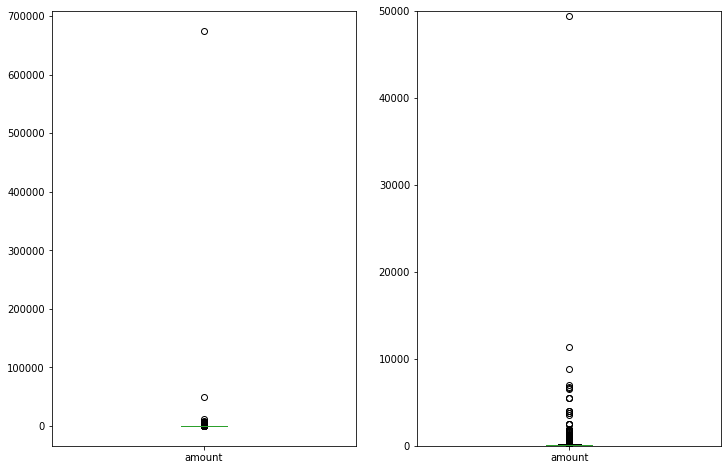

In [53]:
df.query('month_year == "2019-06"')['amount'].plot.box(figsize=(12,8), ax=plt.subplot(1,2,1))
df.query('month_year == "2019-06"')['amount'].plot.box(figsize=(12,8),  ax=plt.subplot(1,2,2))
plt.ylim([0, 50000])#изменим диапазон оси y
plt.show()

Посмотрим, что это за позиция:

In [54]:
df.query('amount > 600000')

,date,customer_id,order_id,product,quantity,price,amount,month_year,product_segment
5392,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Bur...",1000,675.0,675000.0,2019-06,Кухонно-хозяйственные приборы и принадлежности


Так и есть, интернет магазин в этот месяц озолотился на вантузах. Возможно, этот заказ и реален, но от позиции на этом этапе придётся избавится, поскольку ML чувствительно к таким флуктуациям:

In [55]:
#удалим строку с "золотым" вантузом
df.drop(labels = [5392],axis = 0, inplace=True)

Наиболее грубый выброс мы удалили, остальные данные пока оставим без изменения. Посмотрим, как теперь выглядит график с суммой выручки по месяцам:

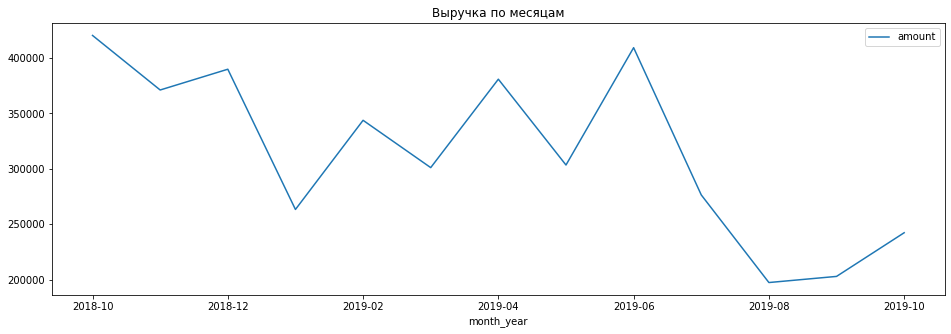

In [56]:
df.pivot_table(index='month_year', values='amount', aggfunc='sum').plot(figsize=(16,5))
plt.title('Выручка по месяцам')
plt.show()

Хотя июнь 2019 был, видимо, действительно удачным месяцем, тем не менее, сейчас график выглядит более приемлемым для алгоритма стандартизации, чем прежде.

Кроме того, на этапе исследовательского анализа данных мы также вычислили пользователя, сделавшего 126 различных заказов. Очевидно, что такой покупатель сам по себе является отдельным сегментом с которым надо работать, поэтому из датафрейма мы его также удалим:

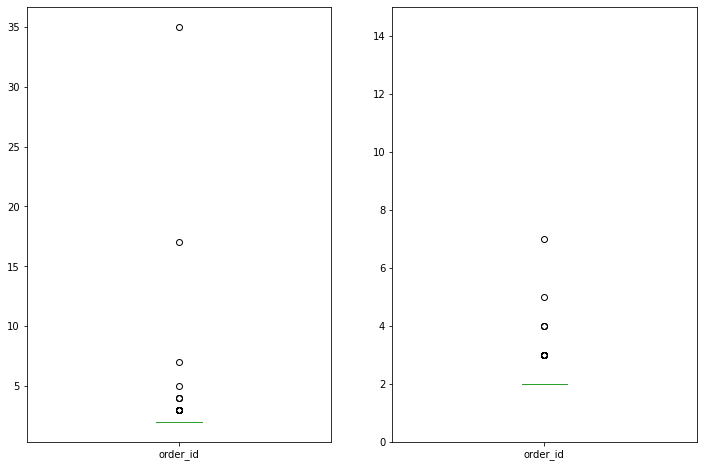

In [57]:
#удаляем выброс по заказам
df = df.query('"c971fb21-d54c-4134-938f-16b62ee86d3b" not in customer_id')

#визуализируем успешность операции
df.pivot_table(index='customer_id', values='order_id', aggfunc='nunique').query('order_id > 1').plot.box(figsize=(12,8), ax=plt.subplot(1,2,1))
df.pivot_table(index='customer_id', values='order_id', aggfunc='nunique').query('order_id > 1').plot.box(figsize=(12,8), ax=plt.subplot(1,2,2))
plt.ylim([0, 15])#изменим диапазон оси y
plt.show()

Операция проведена успешно, поскольку выброс из 126 заказов исчез. Можно продолжать работу.

Очевидно, что для категоризации нам необходимо создать таблицу, содержащую максимальное количество числовых данных, характеризующих каждого пользователя. Из имеющегося у нас датафрейма данных мы можем извлечь:

    - количество сделанных пользователем различных заказов;
    - количество сделанных заказов - клонов;
    - общее количество заказанных позиций во всех заказах;
    - среднее число позиций в заказе,
    - среднее количество заказанного продукта в одной позиции;
    - средняя сумма чека в заказе.
    
Приступим к созданию такой таблицы.\
На первом шаге получим количество различных заказов на пользователя и среднее число позиций в 1 заказе/в 1 "клоне":

In [58]:
#во вспомогательной таблице группируем данные по покупателю, заказу и продукту, изолируя тем самым эффект "клонирования"
f_s = df.pivot_table(index=['customer_id', 'order_id', 'product'], values=['quantity', 'amount'], aggfunc='first').reset_index()

#вычисляем количество различных заказов на пользователя и среднее число продуктов в заказе
diff_orders = f_s.pivot_table(index='customer_id', values=['order_id', 'quantity', 'amount'], 
                              aggfunc={'order_id': 'nunique', 'quantity': ['mean','count'], 'amount': 'sum'})

#переименовываем колонки
diff_orders.columns = ['sum_amount', 'qvt_orders' , 'qvt_items', 'avg_products_per_item']

#вычисляем количество позиций в заказа у покупателя и 
diff_orders['avg_qvt_items_per_оrder'] = diff_orders['qvt_items'] / diff_orders['qvt_orders']
diff_orders['avg_check_per_оrder'] = diff_orders['sum_amount'] / diff_orders['qvt_orders']

#проверяем результат
display(diff_orders.head())

,sum_amount,qvt_orders,qvt_items,avg_products_per_item,avg_qvt_items_per_оrder,avg_check_per_оrder
customer_id,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,555.0,1,4.0,1.0,4.0,555.0
001cee7f-0b29-4716-b202-0042213ab038,442.0,1,1.0,1.0,1.0,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,914.0,1,1.0,2.0,1.0,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,1649.0,1,1.0,1.0,1.0,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,2324.0,1,1.0,2.0,1.0,2324.0


Вычисляем количество заказов-клонов у каждого покупателя:

In [59]:
#агреггируем данные по пользователю, номеру заказа и считаем количество дат на один заказ
clone_order = df.pivot_table(index=['customer_id' , 'order_id'], values='date', 
                              aggfunc='nunique').rename(columns={'date' : 'qvt_clone_orders'}).reset_index()\
                                                                 .drop(columns = 'order_id')

#суммируем количество "клонов" в разных заказах
clone_orders = clone_order.pivot_table(index='customer_id', values = 'qvt_clone_orders', aggfunc='sum')


#убираем "разовые" заказы - получаем клоны
clone_orders['qvt_clone_orders'] = clone_orders['qvt_clone_orders'] - 1

#проверяем результат

clone_order.head()

,customer_id,qvt_clone_orders
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1
1,001cee7f-0b29-4716-b202-0042213ab038,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1


In [60]:
#соединяем таблицы в один датафрейм
categorizing_frame = diff_orders.join(clone_orders)

#добавляем столбец с общим количеством заказов
categorizing_frame['all_orders_qvt'] = categorizing_frame['qvt_orders'] + categorizing_frame['qvt_clone_orders']

#располагаем столбцы в удобочитаемом порядке
categorizing_frame = categorizing_frame.reindex(columns=['qvt_orders', 'qvt_items', 'avg_qvt_items_per_оrder' , 'qvt_clone_orders', 
                            'all_orders_qvt', 'avg_products_per_item', 'avg_check_per_оrder', 'sum_amount'])
#проверяем результат
categorizing_frame.head()

,qvt_orders,qvt_items,avg_qvt_items_per_оrder,qvt_clone_orders,all_orders_qvt,avg_products_per_item,avg_check_per_оrder,sum_amount
customer_id,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,1,4.0,4.0,0,1,1.0,555.0,555.0
001cee7f-0b29-4716-b202-0042213ab038,1,1.0,1.0,0,1,1.0,442.0,442.0
00299f34-5385-4d13-9aea-c80b81658e1b,1,1.0,1.0,0,1,2.0,914.0,914.0
002d4d3a-4a59-406b-86ec-c3314357e498,1,1.0,1.0,0,1,1.0,1649.0,1649.0
003bbd39-0000-41ff-b7f9-2ddaec152037,1,1.0,1.0,0,1,2.0,2324.0,2324.0


**Описание полученного датафрейма для категоризации `categorizing_frame`:**

    qvt_orders - количество сделанных пользователем различных заказов;
    qvt_items - общее количество заказанных позиций во всех заказах;
    avg_qvt_items_per_оrder - среднее количество позиций в заказе;
    qvt_clone_orders - количество сделанных заказов - клонов;
    all_orders_qvt - общее количество заказов сделанных клиентом;
    avg_products_per_item - среднее количество заказанного продукта в одной позиции; 
    avg_check_per_оrder - средний чек заказов;
    sum_amount - выручка с клиента.
Данные подготовлены. Осталось добавить в таблицу категории покупаемых пользователями товаров и преобразовать категориальные переменные в числовые.
Посмотрим, категории каких товаров покупает каждый клиент, агрегируем данные по пользователю и товарам:

In [61]:
df.pivot_table(index=['customer_id', 'product_segment'], values='quantity', aggfunc='count').head()

,,quantity
customer_id,product_segment,
000d6849-084e-4d9f-ac03-37174eaf60c4,Цветы,4
001cee7f-0b29-4716-b202-0042213ab038,Бытовая мебель,1
00299f34-5385-4d13-9aea-c80b81658e1b,Кухонно-хозяйственные приборы и принадлежности,1
002d4d3a-4a59-406b-86ec-c3314357e498,Кухонно-хозяйственные приборы и принадлежности,1
003bbd39-0000-41ff-b7f9-2ddaec152037,Бытовая мебель,1


Преобразуем категориальные переменные в dummy-переменные:

In [62]:
#создаём промежуточную таблицу
dummy_wp = df.pivot_table(index=['customer_id', 'product_segment'], values='quantity').reset_index().set_index('customer_id')

#преобразуем категориальные переменные в dummy-переменные:
dummy_df = pd.get_dummies(dummy_wp)

#приводим столбец количество к 1 для контроля суммирования dummy-строк
dummy_df['quantity'] = 1

#преименовываем колонки 
dummy_df.columns = ['quantity', 'Аксессуары для композиций',
       'Бытовая мебель', 'Бытовая техника',
       'Бытовая химия', 'Комнатные растения',
       'Кухонно-хозяйственные приборы и принадлежности',
       'Посуда', 'Рассада, семена, саженцы',
       'Ручные орудия труда',
       'Средства личной гигиены', 'Фурнитура',
       'Цветы']

#суммируем dummy-строки
dummy_df = dummy_df.pivot_table(index='customer_id', values=dummy_df.columns, aggfunc='sum')

#проверяем успешность операции
dummy_df.query('quantity > 4')

,quantity,Аксессуары для композиций,Бытовая мебель,Бытовая техника,Бытовая химия,Комнатные растения,Кухонно-хозяйственные приборы и принадлежности,Посуда,"Рассада, семена, саженцы",Ручные орудия труда,Средства личной гигиены,Фурнитура,Цветы
customer_id,,,,,,,,,,,,,
4d93d3f6-8b24-403b-a74b-f5173e40d7db,7,1,1,0,0,0,1,1,1,0,0,1,1
81a07ad7-0646-477c-9e11-0a52c6f6f7e1,5,0,0,0,1,0,1,1,1,0,0,0,1
b371ce80-259a-4bb8-a550-0ebff690e3e1,5,0,0,0,1,1,1,0,0,0,1,0,1


Dummy-переменные выглядят неплохо. И как мы можем убедиться, покупателей, приобретающих товаров более чем из 4 категорий, всего четверо, если считать вместе с удалённым ранее "оптовиком"\
Удаляем вспомогательный столбец и присоединяем преобразованные категориальные переменные к общей категоризационной таблице:

In [63]:
#удаляем столбец
dummy_df.drop(columns='quantity', inplace=True)

#соединяем таблицы
categorizing_frame = categorizing_frame.join(dummy_df)

#проверяем результат
categorizing_frame.head(1)

,qvt_orders,qvt_items,avg_qvt_items_per_оrder,qvt_clone_orders,all_orders_qvt,avg_products_per_item,avg_check_per_оrder,sum_amount,Аксессуары для композиций,Бытовая мебель,Бытовая техника,Бытовая химия,Комнатные растения,Кухонно-хозяйственные приборы и принадлежности,Посуда,"Рассада, семена, саженцы",Ручные орудия труда,Средства личной гигиены,Фурнитура,Цветы
customer_id,,,,,,,,,,,,,,,,,,,,
000d6849-084e-4d9f-ac03-37174eaf60c4,1,4.0,4.0,0,1,1.0,555.0,555.0,0,0,0,0,0,0,0,0,0,0,0,1


Переходим делаем следующий шаг.\
Стандартизируем данные:

In [64]:
scaler = StandardScaler() # создаём объект класса scaler (нормализатор)
x_sc = scaler.fit_transform(categorizing_frame) # обучаем нормализатор и преобразуем набор данных 

#проверим работу алгоритма
x_sc[:1]

array([[-0.11867369,  0.61413599,  0.7796552 , -0.15035062, -0.16311522,
        -0.17615772, -0.31138889, -0.28192315, -0.2801809 , -0.35305972,
        -0.04552043, -0.09359995, -0.2022261 , -0.99012321, -0.23150545,
        -0.3380617 , -0.04987547, -0.06444241, -0.09799663,  2.14713968]])

Данные успешно стандартизированы. Передадим получившуюся стандартизированную таблицу в качестве параметра функции linkage() со значением 'ward' в параметре method и визуализируем дендрограмму: 

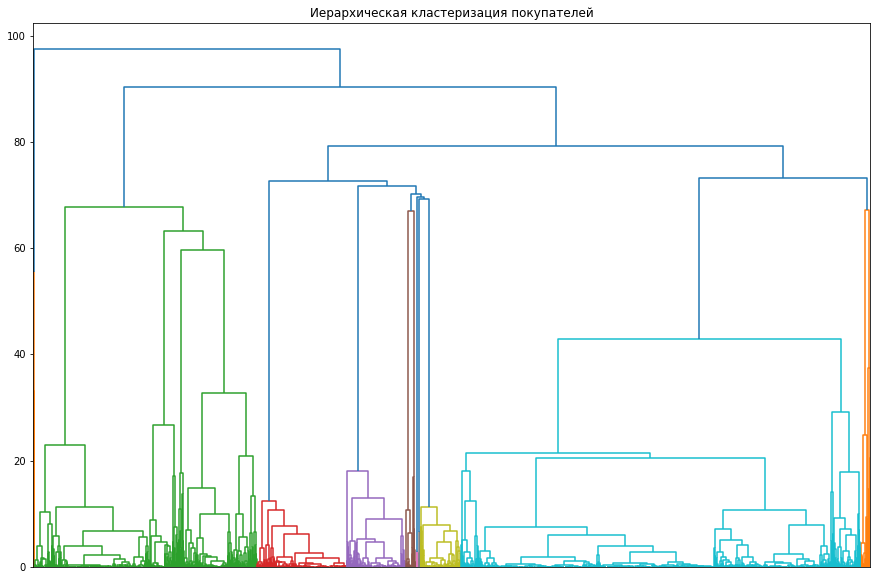

In [65]:
linked = linkage(x_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Иерархическая кластеризация покупателей')
plt.show() 

Как мы видим, алгоритм предложил всего 8 категорий клиентов, однако, как минимум 3 из них очень малы. Поэтому, вероятно, не имеет смысл делать разделение больше чем на 5 сегментов, что, в принципе, согласуется с нашими предварительными оценками, когда мы выделили 2 больших группы, которые в свою очередь, можно было разделить на 3 подкатегории разной величины каждую, т.е. всего 6.\
Однако, на дендрограмме мы видим только 3 больших группы, поэтому попробуем разделить наших клиентов на 3 категории алгоритмом K-Means:

In [66]:
# задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=3, random_state=0)
# прогнозируем кластеры для наблюдений
labels = km.fit_predict(x_sc)

# сохраняем метки кластера в поле нашего датасета
categorizing_frame['clusters'] = labels

# выводим статистику по средним значениям наших признаков по кластеру
round(categorizing_frame.groupby(['clusters']).mean(), 3)

,qvt_orders,qvt_items,avg_qvt_items_per_оrder,qvt_clone_orders,all_orders_qvt,avg_products_per_item,avg_check_per_оrder,sum_amount,Аксессуары для композиций,Бытовая мебель,Бытовая техника,Бытовая химия,Комнатные растения,Кухонно-хозяйственные приборы и принадлежности,Посуда,"Рассада, семена, саженцы",Ручные орудия труда,Средства личной гигиены,Фурнитура,Цветы
clusters,,,,,,,,,,,,,,,,,,,,
0,1.063,1.213,1.142,0.239,1.302,3.607,1244.530,1333.156,0.079,0.124,0.002,0.009,0.031,0.559,0.056,0.000,0.003,0.005,0.01,0.145
1,13.500,18.750,3.821,46.000,59.500,2.467,1377.511,20314.000,0.250,0.500,0.000,0.000,0.000,0.750,0.250,0.750,0.000,0.000,0.25,0.250
2,1.188,6.928,6.109,0.438,1.627,1.998,1087.434,1229.366,0.024,0.007,0.000,0.003,0.103,0.024,0.010,0.839,0.000,0.000,0.00,0.421


Исходя из анализа средних значений выделенных сегментов, можно охарактеризовать их следующим образом:

Абсолютным лидером практически по всем признакам является **сегмент 1**. Вероятнее всего, этот сегмент следовало бы назвать профессиональными покупателями, поскольку именно он делает подавляющее большинство "клонированных" заказов или, иначе говоря,  заказов с регулярной поставкой. Но, помимо этого, он также делает и в 13 раз больше различных, отличающихся по номенклатуре заказов и имеет в 15 раз большую суммарную среднюю выручку с клиента, по сравнению с ближайшим преследователем - нулевым сегментом. Превалирущая тройка категорий товаров - "кухонно-хозяйственные приборы и принадлежности" (встречается в 75% заказов), "рассада, семена, саженцы"(75%) и "бытовая мебель" (50%).

**Сегмент номер 2** превосходит все остальные сегменты по среднему количеству позиций в заказе, - их в 1,5 раза больше, чем у сегмента номер 1. Однако, при этом его участники заказывают наименьшее количество товара в позиции - в среднем не большее 2 штук. Также этот сегмент имеет наименьший средний чек и выручку с одного покупателя. Первая тройка закупаемых товаров: с большим отрывом (83%) закупается "рассада, семена, саженцы" и "цветы"(42%) и комнатные растения (10%). Условно можно назвать этот сегмент "садоводами". Процент товаров остальных категорий у этот сегмента покупателей ничтожен.

**Нулевой сегмент** почти по всем выделенным нами признакам в аутсайдерах. Единственный признак, где он находится на первом месте - это среднее количество заказываемой единицы товара - 3,6, против 2,4 у первого сегмента и 2 у второго. Также он превосходит второй сегмент по среднему чеку и средней выручке с покупателя. Заказы в этом сегменте идут в основном на
"кухонно-хозяйственные приборы и принадлежности" (56%), "цветы" (15%) и "бытовую мебель" (12%). Условно можно назвать представителей этого сегмента "домоседами".

Визуализируем распределения признаков по кластерам и посмотрим, можно ли что-то дополнительно заметить по ним:

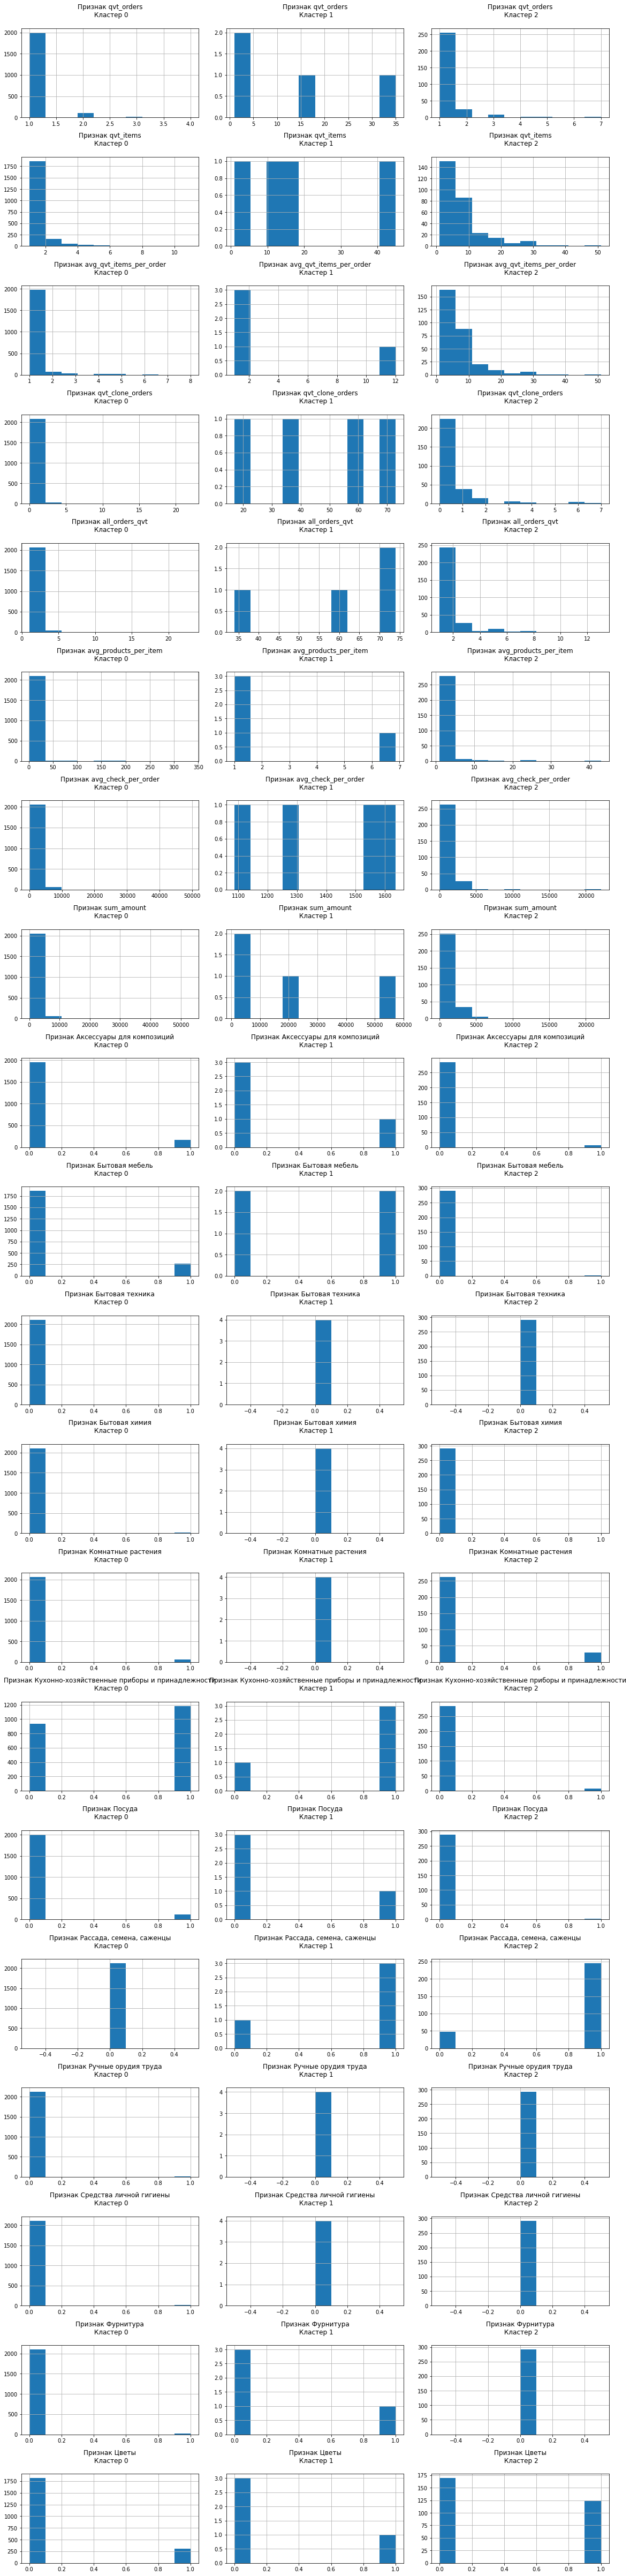

In [67]:
plt.figure(figsize=(16, 70))
i=0
for col in categorizing_frame.columns:
    if col == 'clusters':
        continue
    for cluster in range(3):
        categorizing_frame[categorizing_frame['clusters']==cluster][col].hist(ax=plt.subplot(21, 3, i + 1));
        i+=1
        plt.tight_layout()
        plt.title('Признак {}\n Кластер {}\n'.format(col, cluster))

Как мы видим из гистограмм, самая многочисленная группа - это "домоседы", затем идут "садоводы" и совсем малочисленая группа - "профессиональные покупатели".\
Дополнительно посмотрим, как распределены заказы от участников каждой из групп по месяцам, в течение года:

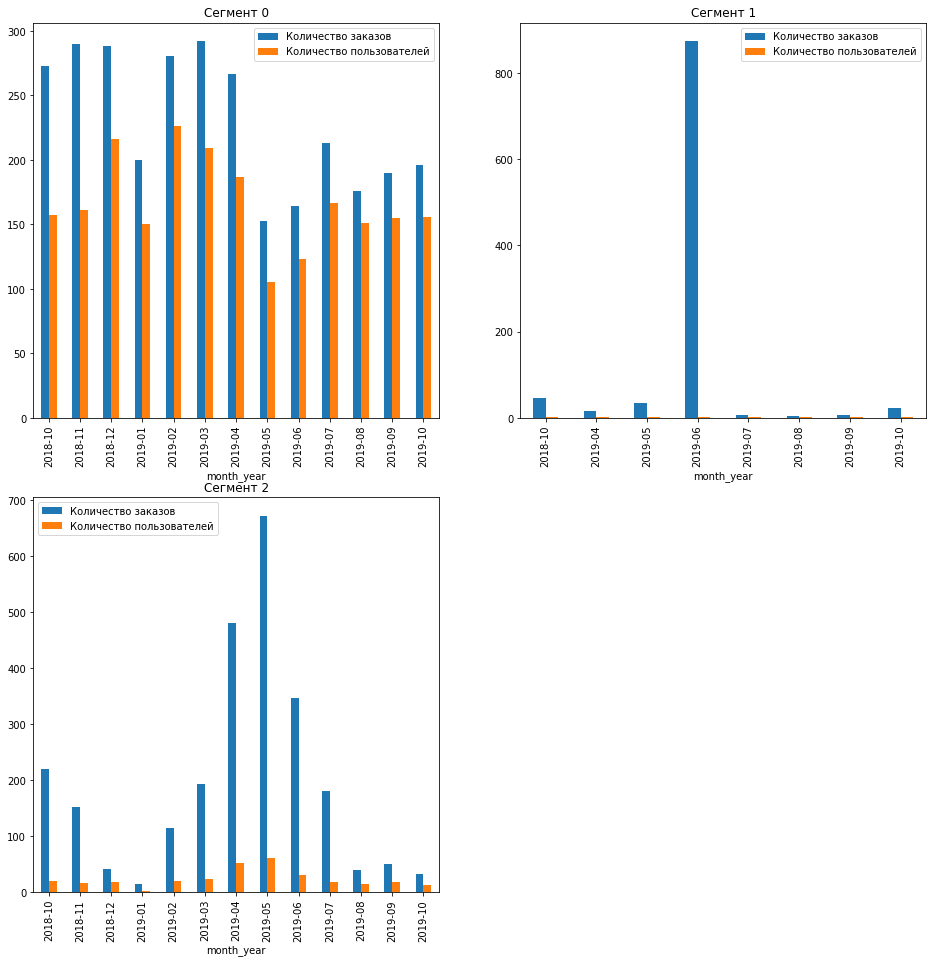

In [68]:
plt.figure(figsize=(16, 16))

list_0 = categorizing_frame.reset_index().query('clusters == 0')['customer_id'].tolist()
df.query('customer_id in @list_0').pivot_table(index='month_year',
                    values='customer_id', aggfunc=['count', 'nunique']).plot.bar(ax=plt.subplot(2,2,1));

plt.legend(['Количество заказов', "Количество пользователей"]);
plt.title('Сегмент 0')
list_1 = categorizing_frame.reset_index().query('clusters == 1')['customer_id'].tolist()

df.query('customer_id in @list_1').pivot_table(index='month_year', 
                    values='customer_id', aggfunc=['count', 'nunique']).plot.bar(ax=plt.subplot(2,2,2));

plt.legend(['Количество заказов', "Количество пользователей"]);
plt.title('Сегмент 1')
list_2 = categorizing_frame.reset_index().query('clusters == 2')['customer_id'].tolist()
df.query('customer_id in @list_2').pivot_table(index='month_year', 
                    values='customer_id', aggfunc=['count', 'nunique']).plot.bar(ax=plt.subplot(2,2,3));

plt.legend(['Количество заказов', "Количество пользователей"]);
plt.title('Сегмент 2')

plt.show()

На построенных столбчатых диаграммах ясно видно, что в нулевом сегменте количество заказов примерно равно количеству покупателей и активность в мае-июне падает, в то время как в "профессиональных сегментах" она, наоборот, растёт в это время.\
Построим круговые диаграммы продуктовых предпочтений потребителей из каждого сегмента:

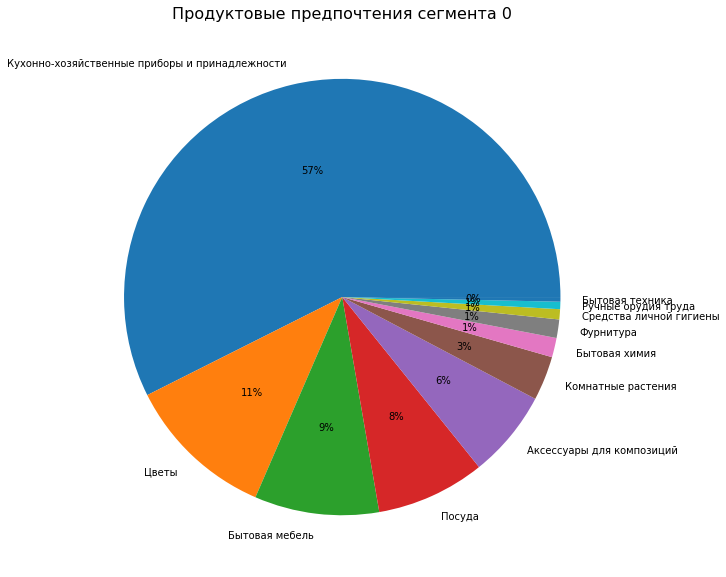

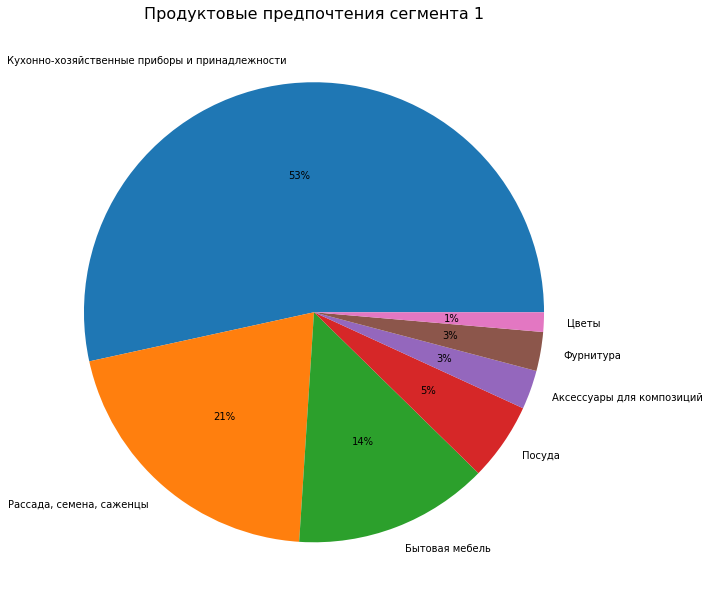

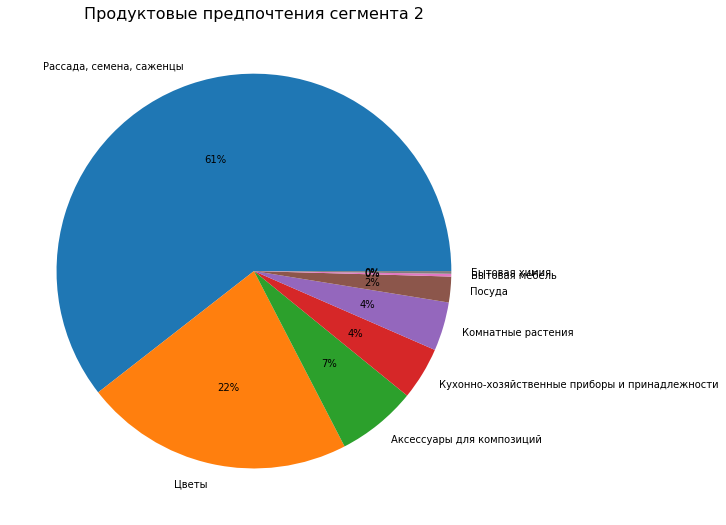

In [69]:
df.query('customer_id in @list_0').pivot_table(index='product_segment', values='product', 
                             aggfunc='nunique').sort_values(by='product', ascending=False).plot.pie(figsize=(10,10),
                                                                         subplots=True, legend=None, autopct='%.0f%%');
plt.title('Продуктовые предпочтения сегмента 0', fontsize=16)
plt.ylabel('')
plt.tight_layout()

df.query('customer_id in @list_1').pivot_table(index='product_segment', values='product', 
                             aggfunc='nunique').sort_values(by='product', ascending=False).plot.pie(figsize=(10,10),
                                                                         subplots=True, legend=None, autopct='%.0f%%');
plt.title('Продуктовые предпочтения сегмента 1', fontsize=16)
plt.ylabel('')
plt.tight_layout()


df.query('customer_id in @list_2').pivot_table(index='product_segment', values='product', 
                             aggfunc='nunique').sort_values(by='product', ascending=False).plot.pie(figsize=(10,10),
                                                                         subplots=True, legend=None, autopct='%.0f%%');
plt.title('Продуктовые предпочтения сегмента 2', fontsize=16)
plt.ylabel('')
plt.tight_layout()

plt.show()

Стоит отметить, что в круговых диаграммах отображены доли предпочтения пользователей, а не процент от количества заказанных товаров.

## Проверка статистических гипотез
Проверим, отличаются ли средние средних чеков покупателей из различных категорий. Выведем средние значения средних чеков покупателей из каждой группы:

In [70]:
categorizing_frame.groupby(['clusters'])[['avg_check_per_оrder']].mean()

,avg_check_per_оrder
clusters,
0,1244.529689
1,1377.510924
2,1087.434271


На интуитивном уровне кажется, что отличий нет. Проверим свою интуицию методом ttest_ind.

**Нулевая гипотеза:** средние значения средних чеков у различных сегментов покупателей одинаковы.\
**Альтернативная гипотеза:** средние значения средних чеков отличаются.

За пороговое значение уровня значимости возьмём значение 0.01

In [71]:
#проверим дисперсии всех трёх выборок
print('Дисперсия выборки 0:', round(np.var(categorizing_frame.query('clusters == 0')['avg_check_per_оrder'])))
print('Дисперсия выборки 1:', round(np.var(categorizing_frame.query('clusters == 1')['avg_check_per_оrder'])))
print('Дисперсия выборки 2:', round(np.var(categorizing_frame.query('clusters == 2')['avg_check_per_оrder'])))

Дисперсия выборки 0: 4925021
Дисперсия выборки 1: 47342
Дисперсия выборки 2: 2612657


Дисперсии впечатляют, но, очевидно, что все они разные. Значит при применении стат.метода используем соответствующий параметр.

In [72]:
results = st.ttest_ind(categorizing_frame.query('clusters == 0')['avg_check_per_оrder'],
                       categorizing_frame.query('clusters == 1')['avg_check_per_оrder'], equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  0.3796135949518578


In [73]:
results = st.ttest_ind(categorizing_frame.query('clusters == 1')['avg_check_per_оrder'],
                       categorizing_frame.query('clusters == 2')['avg_check_per_оrder'], equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  0.10571682765835924


In [74]:
results = st.ttest_ind(categorizing_frame.query('clusters == 0')['avg_check_per_оrder'],
                       categorizing_frame.query('clusters == 2')['avg_check_per_оrder'], equal_var = False)
print('p-значение: ', results.pvalue)

p-значение:  0.14014664966340454


Очевидно, что при всей непохожести кластеров друг на друга средние значения средних чеков во всех сегментах одинаковы. Нулевая гипотеза подтверждается.

## Выводы и базовые рекомендации
В ходе исследования, применив специальные алгоритмы, мы выделили 3 группы потребителей, две из которых покупают товары на регулярной основе. Их отличие в том, что сегмент № 1 в основном использует заказы с регулярной поставкой, а сегмент № 2 делает разные заказы, однако, с бóльшим количеством номенклатуры товаров в одном заказе. У обоих сегментов видна чётко выраженная сезонная периодичность - резкий всплеск потребления в мае-июне (у сегмента №2 с февраля по июль), связанный с сельскохозяйственной деятельностью. Очевидно, что фактор сезонности необходимо учитывать в рекламной деятельности, особенно для второго сегмента, где доминирующими категориями потребления являются "рассада, семена, саженцы", "цветы", а также "аксессуары для создания композиций" (флористика). Покупатели из первого сегмента в основном интересуются товарами из области "кухонно хозяйственных приборов и принадлежностей". Поскольку этот сектор широко использует долгосрочные заказы с регулярной поставкой, вероятно, это партнёры интернет-магазина, имеющие какие-то специальные контракты. Если это не так, то для стимулирования сбыта, в отношении данных покупателей можно было бы сделать какие-то специальные предложения, например, на условиях увеличения количества закупок.

Тоже самое касается сегмента номер два, в отношении участников которого можно было бы предложить переход с эпизодических заказов, на долговременные контракты с регулярной поставкой.

Что касается нулевого сегмента, то здесь в подавляющем большинстве состоят обычные бытовые потребители, делающие редкие единичные разовые заказы, периодичность которых у большинства на горизонте года не просматривается. Интересуются тем, что связано с обычной бытовой деятельностью: кухня, цветы, мебель, посуда, флористика. Эта группа потребителей предположительно может реагировать на различные акции в области бытовых товаров, а также сезонных предложений связанных с праздничным календарём, например, предложения цветов и комнатных растений на 8 марта, 1 сентября и т.д... Судя по имеющимся данным для этого сегмента также может быть характерна предновогодняя активность, т.к. на графиках наблюдается рост потребления в октябре-декабре, с резким спадом в январе месяце.

Используя созданный в ходе исследования категориальный массив данных, можно в дальнейшем в ручном режиме уточнить сегментацию потребителей, верифицировать и вернуть в базу покупателей, имеющих "выдающиеся характеристики", которые делали невозможным применение на данных с их участием машинных алгоритмов кластеризации, а также сформировать подкатегории связанные с потребительской активностью в отношении определённых товарных сегментов.

## Чек-лист готовности проекта

- [x] открыт файл
- [x] файл изучен
- [x] заменены названия столбцов на удобные
- [x] визуализировано распределение данных
- [x] произведена первичная верификация выбросов
- [x] данные проверены на неявные дубликаты
------------
- [x] удалены дубликаты
- [x] данные приведены к нужным типам
- [x] добавлен столбец с суммой заказа
- [x] добавлен столбец с годом и месяцем
------------
- [x] посчитана доля "оптовых" заказов
- [x] визуализированы и изучены выбросы и распределение данных
- [x] изучены заказы-клоны и "многопозиционные" заказы
- [x] выделен и дифференцирован на составляющие сегмент лояльных клиентов
- [x] визуализировано количество заказов выручка по месяцам
------------
- [x] выведен список уникальных значений всех имеющихся товаров
- [x] создан датафрейм с первым словом из названия товара,
- [x] проанализирована возможность однозначной идентификации товарной группы по этому признаку
- [x] разнесены индексы "ключевых слов" по товарным группам (внешнее приложение)
- [x] сохранена таблица с товарными группами как csv и экспортирована в рабочий каталог Яндекс-практикума
- [x] из индексов созданы списки со строчными "ключами" товарных сегментов
- [x] проверено отсутствие пропусков в "ключах" сегментов
- [x] откорректированы названия продуктов из разных сегментов, имеющие одинаковый "ключ"
- [x] создан столбец с товарными сегментами в основном датафрейме
- [x] проверено отсутствие ошибок в разбиении товаров на сегменты, группировкой по сегментам и товарам
-------------
- [x] сегментированы потребители с помощью linkage() и KMeans
- [x] изучены средние значения признаков для сегментов
- [x] построены и изучены распределения признаков для сегментов
- [x] проверены статистические гипотезы
- [x] описаны выделенные сегменты
- [x] сформулированы выводы и базовые рекомендации по применению выявленных сегментов в подготовке предложений клиентам